<a href="https://colab.research.google.com/github/yunusemrecay1/cs210/blob/main/CS210_TERM_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

YUNUS EMRE ÇAY - 31260

EXPLORING THE DATASET

In [ ]:
import pandas as pd

excel_file_path = 'diet.xlsx'

df = pd.read_excel(excel_file_path)

print(df)

         DATE  CALORIE (KCAL)  PROTEIN (GR)  WATER (ML)  WEIGHT (KG)
0  2023-10-12            1592         130.0        2000           97
1  2023-10-13            1298          98.0        3500           97
2  2023-10-14            1526         112.0        3000           97
3  2023-10-15            1441         107.0        2750           97
4  2023-10-16            1069          74.0        3500           97
..        ...             ...           ...         ...          ...
86 2024-01-06            1335         117.0        1750           92
87 2024-01-07            1102          96.0        2250           92
88 2024-01-08            1485         124.0        2000           92
89 2024-01-09            1320          99.0        3000           92
90 2024-01-10            1034          95.0        2500           92

[91 rows x 5 columns]


In [ ]:
dataset_shape = df.shape
dataset_shape

(91, 5)

In [ ]:
dataset_summary = df.info()
dataset_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            91 non-null     datetime64[ns]
 1   CALORIE (KCAL)  91 non-null     int64         
 2   PROTEIN (GR)    91 non-null     float64       
 3   WATER (ML)      91 non-null     int64         
 4   WEIGHT (KG)     91 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.7 KB


In [ ]:
numeric_summary = df.describe()
print("Summary Statistics of Numeric Columns:")
print(numeric_summary)


Summary Statistics of Numeric Columns:
       CALORIE (KCAL)  PROTEIN (GR)   WATER (ML)  WEIGHT (KG)
count       91.000000     91.000000    91.000000    91.000000
mean      1366.186813    117.963516  2795.604396    94.967033
std        213.230752     25.125659   641.424125     1.642833
min        917.000000     74.000000  1500.000000    92.000000
25%       1278.000000    101.500000  2250.000000    93.500000
50%       1358.000000    114.000000  2750.000000    95.000000
75%       1487.000000    131.200000  3225.000000    96.000000
max       1854.000000    202.000000  4500.000000    97.000000


In [ ]:
import pandas as pd

# Copy the DataFrame
df_copy = df.copy()



In [ ]:
# Remove outliers based on specified ranges

# Calorie range: 1200-1700
calorie_mask = (df_copy['CALORIE (KCAL)'] >= 1200) & (df_copy['CALORIE (KCAL)'] <= 1700)

# Water range: 2500-4000
water_mask = (df_copy['WATER (ML)'] >= 2500) & (df_copy['WATER (ML)'] <= 4000)

# Protein range: 100-170
protein_mask = (df_copy['PROTEIN (GR)'] >= 100) & (df_copy['PROTEIN (GR)' ] <= 170)

# Apply the masks to filter the DataFrame
df_copy = df_copy[calorie_mask & water_mask & protein_mask]


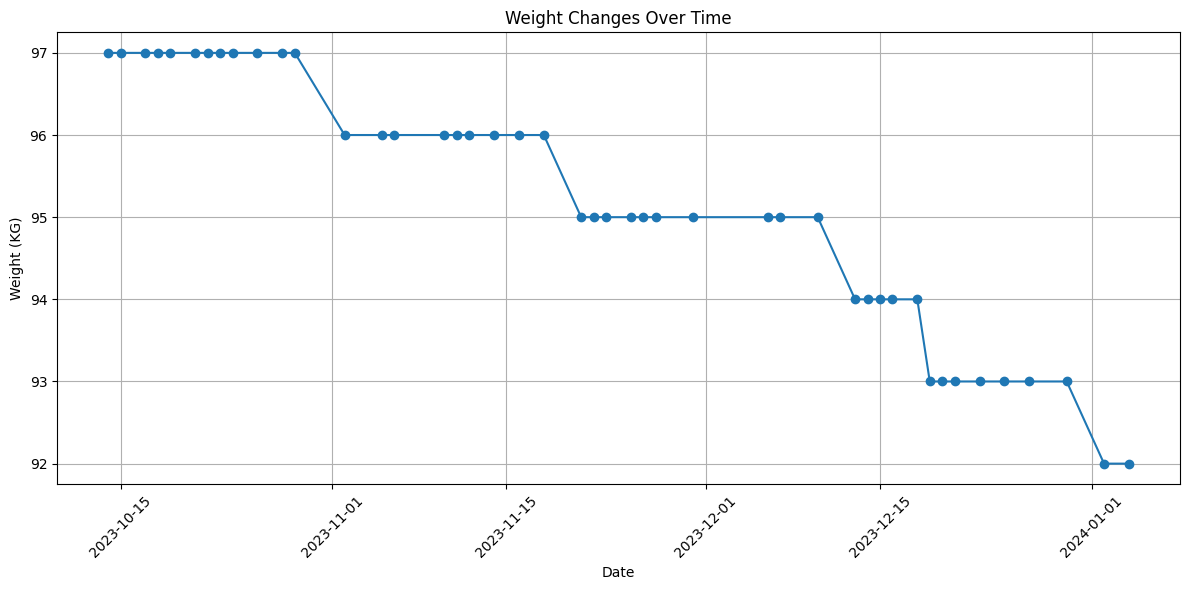

In [ ]:
import matplotlib.pyplot as plt

# Convert 'DATE' to datetime format if it's not already
df_copy['DATE'] = pd.to_datetime(df_copy['DATE'])

# Plotting weight changes with dates
plt.figure(figsize=(12, 6))
plt.plot(df_copy['DATE'], df_copy['WEIGHT (KG)'], marker='o', linestyle='-')
plt.title('Weight Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (KG)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


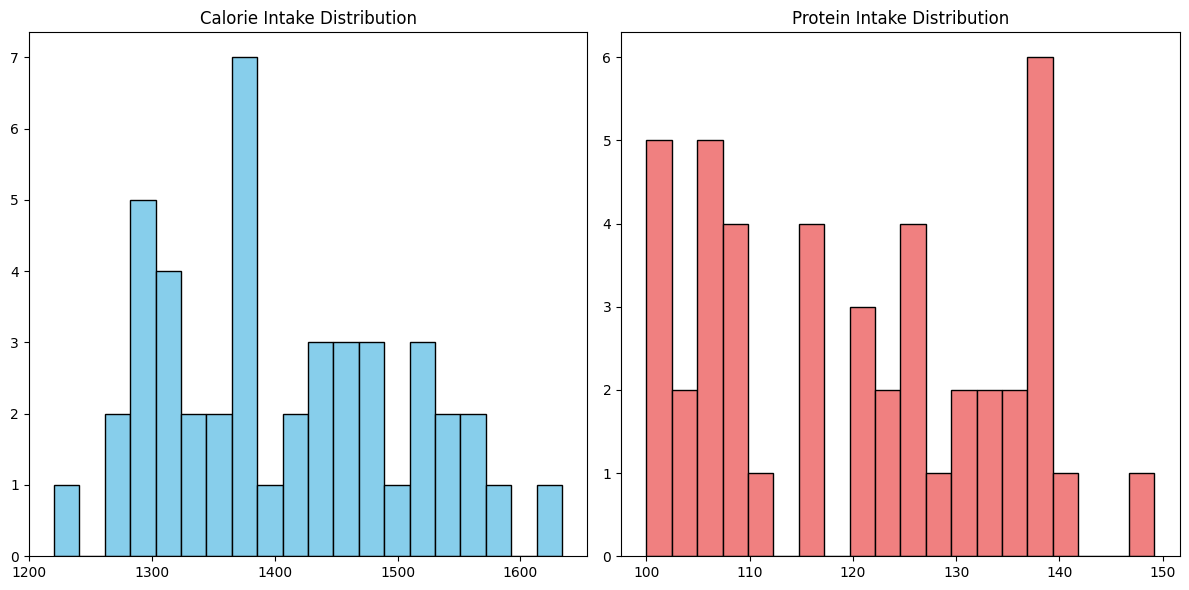

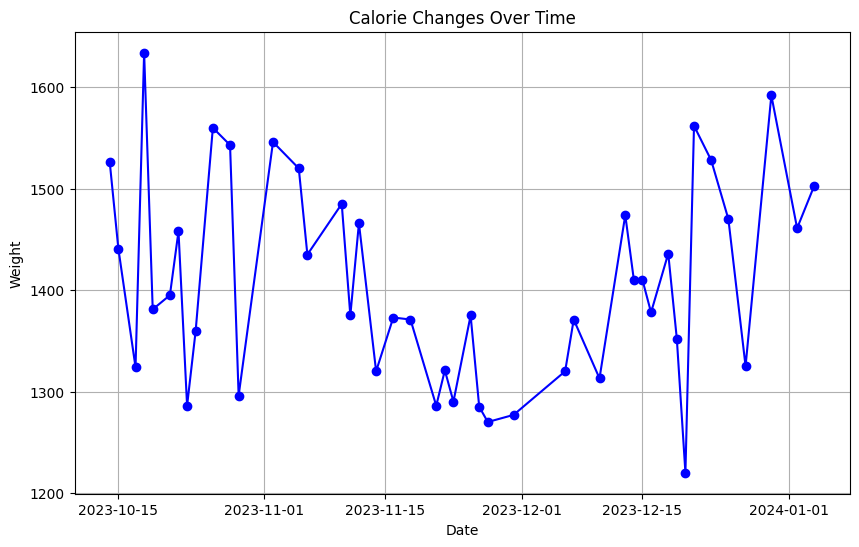

In [ ]:
# Histogram for Calorie and Protein intake
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_copy['CALORIE (KCAL)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Calorie Intake Distribution')

plt.subplot(1, 2, 2)
plt.hist(df_copy['PROTEIN (GR)'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Protein Intake Distribution')

plt.tight_layout()
plt.show()

# Line plot for Calorie changes over time
plt.figure(figsize=(10, 6))
plt.plot(df_copy['DATE'], df_copy['CALORIE (KCAL)'], marker='o', linestyle='-', color='b')
plt.title('Calorie Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

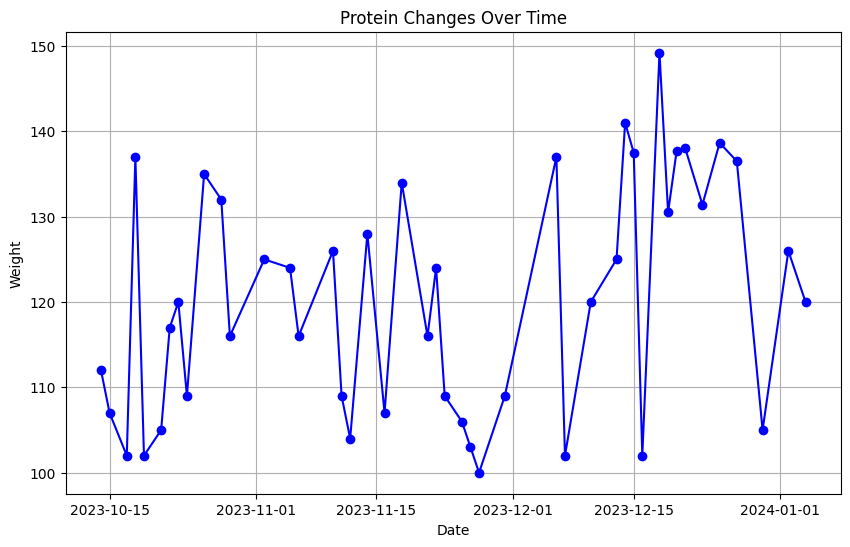

In [ ]:
# Line plot for Protein changes over time
plt.figure(figsize=(10, 6))
plt.plot(df_copy['DATE'], df_copy['PROTEIN (GR)'], marker='o', linestyle='-', color='b')
plt.title('Protein Changes Over Time')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.grid(True)
plt.show()

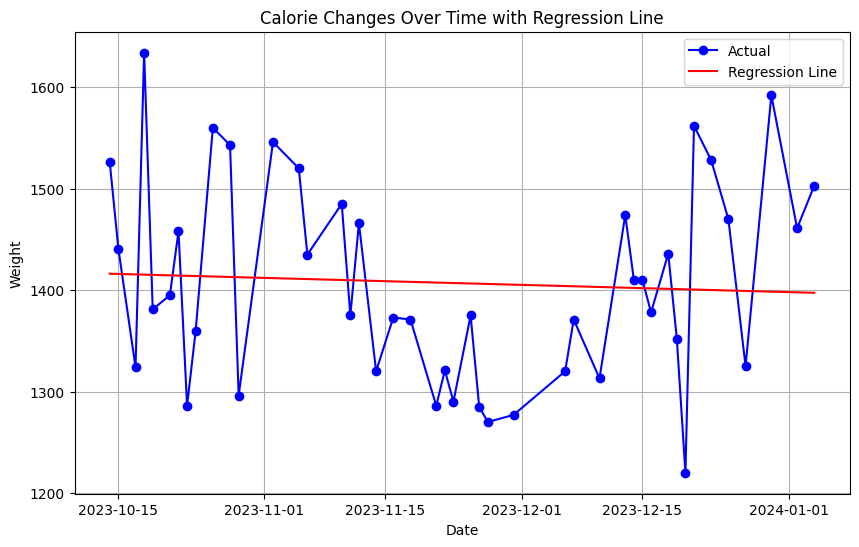

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Convert 'DATE' to a numerical representation for linear regression
df_copy['DATE_NUMERIC'] = pd.to_numeric(df['DATE'])

# Prepare the data
X = df_copy[['DATE_NUMERIC']]
y = df_copy['CALORIE (KCAL)']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values using the model
y_pred = model.predict(X)

# Plot the line plot
plt.figure(figsize=(10, 6))
plt.plot(df_copy['DATE'], df_copy['CALORIE (KCAL)'], marker='o', linestyle='-', color='b', label='Actual')
plt.plot(df_copy['DATE'], y_pred, linestyle='-', color='r', label='Regression Line')

plt.title('Calorie Changes Over Time with Regression Line')
plt.xlabel('Date')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


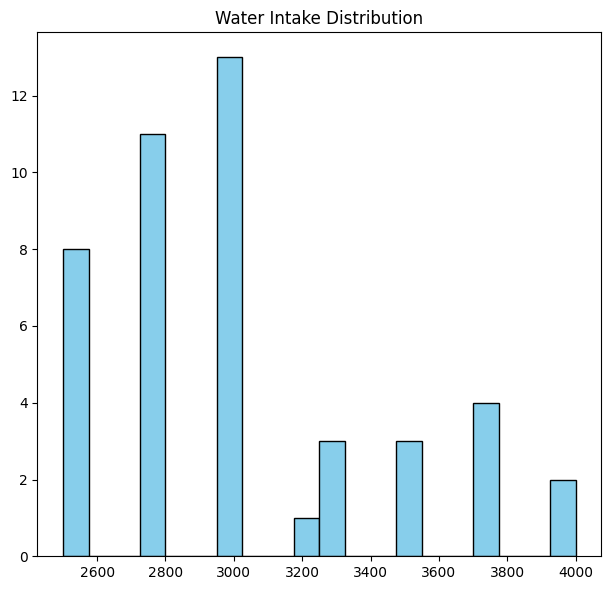

In [ ]:
# Histogram for Calorie and Protein intake
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_copy['WATER (ML)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Water Intake Distribution')

plt.tight_layout()
plt.show()

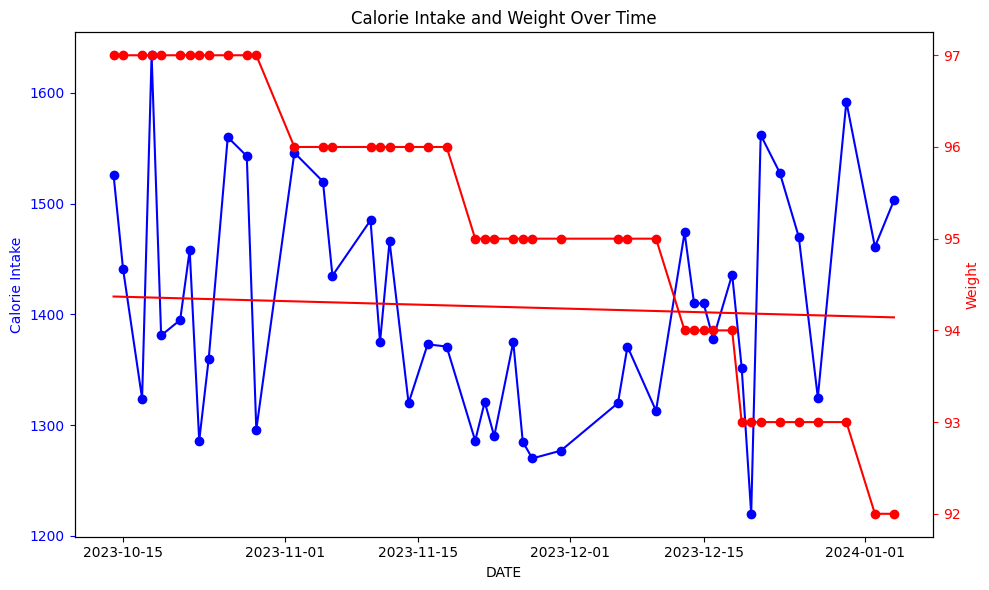

In [ ]:


# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Calorie Intake on the primary y-axis

ax1.plot(df_copy['DATE'], df_copy['CALORIE (KCAL)'], marker='o', linestyle='-', color='b', label='Actual')
ax1.plot(df_copy['DATE'], y_pred, linestyle='-', color='r', label='Regression Line')
ax1.set_xlabel('DATE')
ax1.set_ylabel('Calorie Intake', color='b')
ax1.tick_params('y', colors='b')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot Weight on the secondary y-axis
ax2.plot(df_copy['DATE'], df_copy['WEIGHT (KG)'], label='Weight', marker='o', color='r')
ax2.set_ylabel('Weight', color='r')
ax2.tick_params('y', colors='r')

# Title and legend
plt.title('Calorie Intake and Weight Over Time')
fig.tight_layout()
plt.show()

CORRELATION

<ipython-input-62-7d7529f80a84>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.drop('DATE_NUMERIC', axis=1).corr()


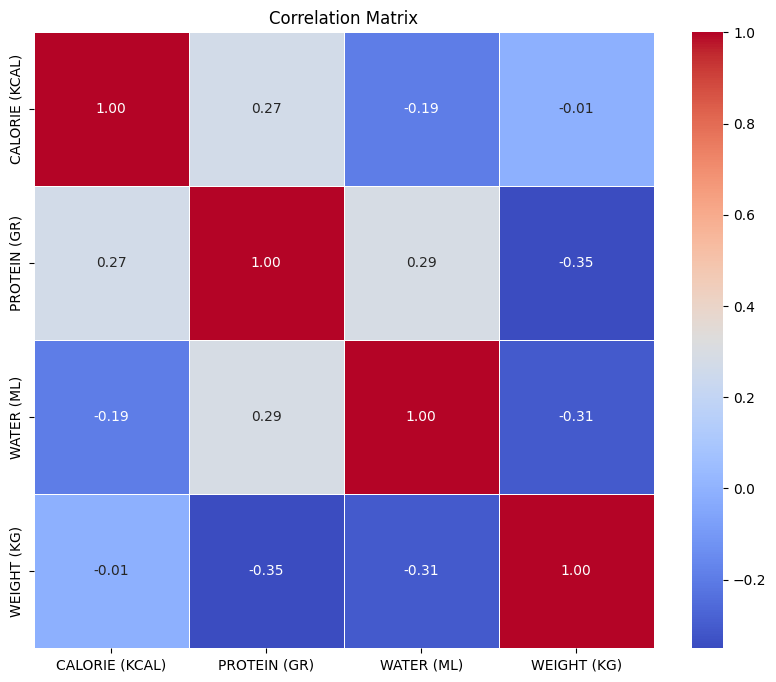

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = df_copy.drop('DATE_NUMERIC', axis=1).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
numeric_summary = df_copy.describe()
print("Summary Statistics of Numeric Columns:")
print(numeric_summary)

Summary Statistics of Numeric Columns:
       CALORIE (KCAL)  PROTEIN (GR)   WATER (ML)  WEIGHT (KG)  DATE_NUMERIC
count       45.000000     45.000000    45.000000    45.000000  4.500000e+01
mean      1407.200000    120.255556  3015.555556    95.177778  1.700619e+18
std        100.749148     13.724170   423.838282     1.556349  2.175405e+15
min       1220.000000    100.000000  2500.000000    92.000000  1.697242e+18
25%       1321.000000    107.000000  2750.000000    94.000000  1.698538e+18
50%       1381.000000    120.000000  3000.000000    95.000000  1.700611e+18
75%       1474.000000    132.000000  3250.000000    97.000000  1.702598e+18
max       1634.000000    149.210000  4000.000000    97.000000  1.704326e+18


In [ ]:
calorie_mean = df_copy['CALORIE (KCAL)'].mean()

print(f"The mean of the 'CALORIE' column is: {calorie_mean}")

water_mean = df_copy['WATER (ML)'].mean()

print(f"The mean of the 'WATER' column is: {water_mean}")

protein_mean = df_copy['PROTEIN (GR)'].mean()

print(f"The mean of the 'PROTEIN' column is: {protein_mean}")



The mean of the 'CALORIE' column is: 1407.2
The mean of the 'WATER' column is: 3015.5555555555557
The mean of the 'PROTEIN' column is: 120.25555555555556


In [ ]:
# Extract the correlation between Calorie and Weight
calorie_weight_corr = df_copy['CALORIE (KCAL)'].corr(df_copy['WEIGHT (KG)'])
print(f'Correlation between Calorie and Weight: {calorie_weight_corr}')

# Extract the correlation between Calorie and Weight
calorie_weight_corr = df['CALORIE (KCAL)'].corr(df['WEIGHT (KG)'])
print(f'Correlation between Calorie and Weight: {calorie_weight_corr}')



Correlation between Calorie and Weight: -0.008203805939660136
Correlation between Calorie and Weight: 0.09346080570475393


CORRELATION BETWEEN HYPOTHETICAL FEATURES

In [ ]:
# Hypothetical features
df_copy['NutrientDensityScore'] = df_copy['PROTEIN (GR)'] / df_copy['CALORIE (KCAL)']  # Nutrient Density Score
df_copy['HydrationIndex'] = df_copy['WATER (ML)'] / df_copy['CALORIE (KCAL)']  # Hydration Index

# Correlation with the target variable
correlation_nutrient_density = df_copy['NutrientDensityScore'].corr(df_copy['HydrationIndex'])

print(f"Correlation between Nutrient Density Score and WEIGHT: {correlation_nutrient_density}")


# bunların ne anlama geldiğini açıkla

Correlation between Nutrient Density Score and WEIGHT: 0.49201417858026253


TRAIN / TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
features = df_copy[['CALORIE (KCAL)', 'PROTEIN (GR)', 'WATER (ML)']]
target = df_copy['WEIGHT (KG)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, "Target:", y_test.shape)


Training set shape - Features: (36, 3) Target: (36,)
Testing set shape - Features: (9, 3) Target: (9,)


PREDICTING WEIGHT

Mean Squared Error (MSE): 2.2482058144826125
R-squared (R2): 0.2217749103714033


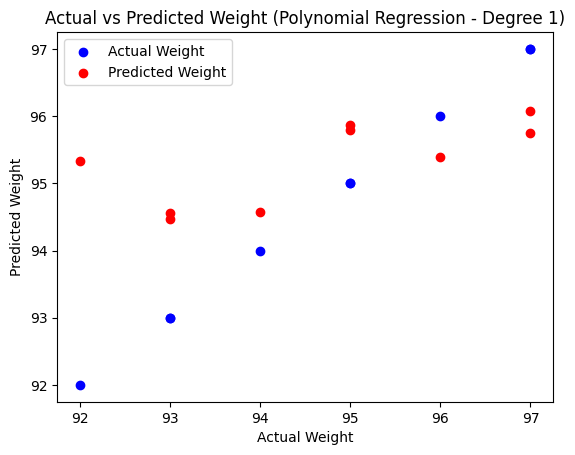

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Polynomial features transformation
degree = 1
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the polynomial features
model.fit(X_train_poly, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Plot actual values in blue
plt.scatter(y_test, y_test, c='blue', label='Actual Weight')

# Plot predicted values in red
plt.scatter(y_test, predictions, c='red', label='Predicted Weight')

plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title(f"Actual vs Predicted Weight (Polynomial Regression - Degree {degree})")
plt.legend()
plt.show()


MACHINE LEARNING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Get the best accuracy from cross-validation
best_accuracy = grid_search.best_score_

print(f"Best max_depth: {best_max_depth}")
print(f"Best min_samples_split: {best_min_samples_split}")
print(f"Best accuracy: {best_accuracy}")

Best max_depth: 3
Best min_samples_split: 2
Best accuracy: 0.31071428571428567


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


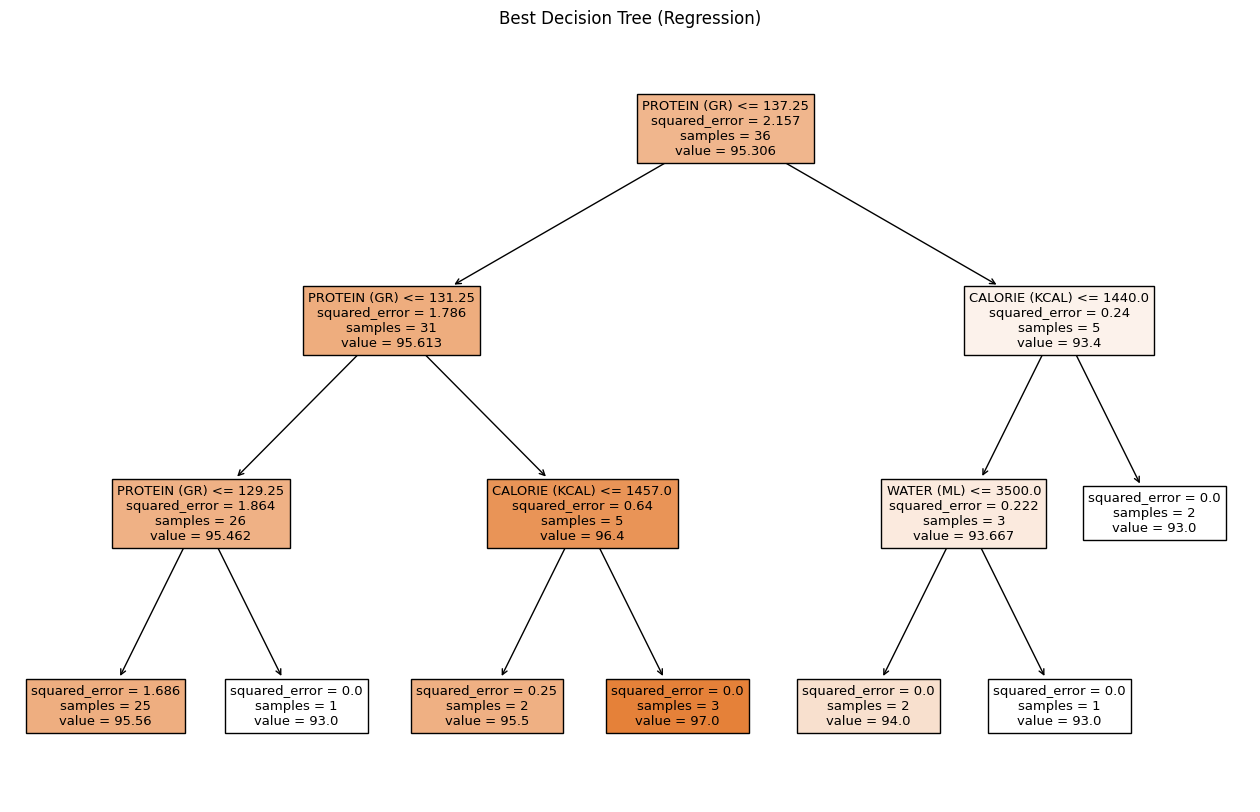

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

best_dt_regressor = DecisionTreeRegressor(max_depth=best_max_depth, min_samples_split=best_min_samples_split)
best_dt_regressor.fit(X_train, y_train)
plt.figure(figsize=(16, 10))
plot_tree(best_dt_regressor, filled=True, feature_names=features.columns)
plt.title("Best Decision Tree (Regression)")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Define models
models = {
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'K-Neighbors': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'Neural Network': MLPRegressor(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = r2_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")


Random Forest Accuracy: -0.2369346153846159
SVM Accuracy: -0.01986974439053646
K-Neighbors Accuracy: -0.16615384615384765
Linear Regression Accuracy: 0.2217749103714024
Neural Network Accuracy: -22.041823533579866
Naive Bayes Accuracy: 0.15384615384615385
Gradient Boosting Accuracy: -0.7630111188600504


In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Extract relevant columns
calorie_intake = df_copy['CALORIE (KCAL)']
weight_changes = df_copy['WEIGHT (KG)']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(calorie_intake, weight_changes)

print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")


Pearson Correlation Coefficient: -0.008203805939660233
P-value: 0.9573454634008214
